In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

pd.set_option('display.max_rows', 10)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [3]:
## 인구

pop = pd.read_csv('./data/23년 주민등록인구.csv', skiprows=2)
pop= pop[['동별(2)', '동별(3)', '소계.1']]
pop.columns = ['행정구', '행정동', '인구수']
pop.drop( pop[pop['행정동'] == '소계'].index, axis=0, inplace = True)
pop.sort_values('행정동', inplace = True)
pop.reset_index(drop= True, inplace = True);pop

행정구   행정동    인구수
0     송파구  가락1동  27670
1     송파구  가락2동  31450
2     송파구  가락본동  25617
3     구로구  가리봉동  12478
4     금천구   가산동  27166
..    ...   ...    ...
421   용산구   효창동  10828
422   용산구   후암동  16540
423  동대문구  휘경1동  16168
424  동대문구  휘경2동  25288
425   동작구   흑석동  32366

[426 rows x 3 columns]

In [4]:
## 산업지역

work = pd.read_csv('./data/21년 서울시 사업체현황.csv')
work_company = work[(work['동별'].str[-1] == '동') & (work['구분별'] == '사업체수') & (work['산업대분류별'] == '합계')]
worker = work[(work['동별'].str[-1] == '동') & (work['구분별'] == '종사자수') & (work['산업대분류별'] == '합계')]

worker = worker[['동별', '2021 년']].copy()
worker.columns = ['동별', '종사자수']
worker.sort_values('동별', inplace = True)
worker['동별'] = worker['동별'].replace('일원2동', '개포3동')
worker.sort_values('동별', inplace = True)
worker.reset_index(drop=True, inplace=True); worker

동별    종사자수
0    가락1동   12367
1    가락2동   11544
2    가락본동   28151
3    가리봉동    4248
4     가산동  182376
..    ...     ...
421   효창동    2596
422   후암동    4605
423  휘경1동    3690
424  휘경2동    5457
425   흑석동   11037

[426 rows x 2 columns]

In [5]:
work_com = work_company[['동별', '2021 년']].copy()
work_com.columns = ['동별', '사업체수']
work_com['동별'] = work_com['동별'].replace('일원2동', '개포3동')
work_com.sort_values('동별', inplace = True)
work_com.reset_index(drop=True, inplace=True); work_com

동별   사업체수
0    가락1동   3791
1    가락2동   3155
2    가락본동   5069
3    가리봉동   1189
4     가산동  25043
..    ...    ...
421   효창동    702
422   후암동   1367
423  휘경1동   1285
424  휘경2동   1665
425   흑석동   2136

[426 rows x 2 columns]

In [6]:
## 주거지역

house = pd.read_csv('./data/서울시 주택종류별 주택 (동별) 통계.csv', skiprows=3)
house.drop(house[house['동별(3)'] == '소계'].index, axis=0, inplace = True)
house = house[['동별(3)', '소계']]
house.columns = ['동별', '집 개수']

house['동별'] = house['동별'].replace('일원2동', '개포3동')
house.sort_values('동별', inplace = True); house.reset_index(drop=True, inplace=True); house
house



동별   집 개수
0    가락1동   9716
1    가락2동  10424
2    가락본동   8410
3    가리봉동   2551
4     가산동   6200
..    ...    ...
420   효창동   3463
421   후암동   5363
422  휘경1동   4327
423  휘경2동   6802
424   흑석동   9613

[425 rows x 2 columns]

In [7]:
# 소득


money = pd.read_csv('./data/서울시 상권분석서비스(소득소비-행정동).csv', encoding = 'cp949')
money = money[['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '지출_총금액']]
money = money[money['기준_년분기_코드'] == 20231]
money = money[['행정동_코드_명', '월_평균_소득_금액']].copy(); money
money.columns = ['동별', '소득']
money['동별'] = money['동별'].replace('일원2동', '개포3동')
money.sort_values('동별', inplace=True); money.reset_index(drop=True, inplace=True); money
money

동별       소득
0    가락1동  4973588
1    가락2동  3910198
2    가락본동  3521561
3    가리봉동  2336331
4     가산동  2567594
..    ...      ...
420   효창동  3523201
421   후암동  3013677
422  휘경1동  2722774
423  휘경2동  3071586
424   흑석동  4224946

[425 rows x 2 columns]

In [8]:
# 교통혼잡도

traffic = pd.read_csv('./data/행정동별 교통혼잡시 평균속도 .csv')
traffic['emd_code'] = traffic['emd_code'].astype('str')
seoul_traffic = traffic[traffic['emd_code'].str[:1] == '1']
seoul_traffic

sido_code  sigungu_code emd_code week_type  velocity_CG_AVRG
0        11000         11010  1101053   weekday             19.12
1        11000         11010  1101054   weekday             18.28
2        11000         11010  1101055   weekday             19.05
3        11000         11010  1101056   weekday             18.53
4        11000         11010  1101057   weekday             12.86
..         ...           ...      ...       ...               ...
419      11000         11250  1125070   weekday             14.57
420      11000         11250  1125071   weekday             16.37
421      11000         11250  1125072   weekday             15.60
422      11000         11250  1125073   weekday             21.15
423      11000         11250  1125074   weekday             17.09

[424 rows x 5 columns]

In [9]:
## 학생 비율, 노인 비율

age = pd.read_csv('./data/행정동별 연령 인구.csv', encoding = 'utf-8')
age = age[age['동별'].str[-1] == '동']

age2 = age[(age['연령별'] != '합계') & (age['항목'] == '계')]

age2.reset_index(drop=True, inplace = True)
age2.columns = ['동별', '연령별', '항목', '단위', '인구수']

age2



동별      연령별 항목  단위  인구수
0      사직동     0~4세  계 NaN  178
1      사직동     5~9세  계 NaN  310
2      사직동   10~14세  계 NaN  313
3      사직동   15~19세  계 NaN  356
4      사직동   20~24세  계 NaN  420
...    ...      ... ..  ..  ...
8941  상일2동   80~84세  계 NaN  235
8942  상일2동   85~89세  계 NaN  133
8943  상일2동   90~94세  계 NaN   56
8944  상일2동   95~99세  계 NaN   16
8945  상일2동  100세 이상  계 NaN    3

[8946 rows x 5 columns]

In [10]:
consent = age2['동별'].unique()
df = pd.DataFrame(consent, columns = ['동별'])
age_groups = age2['연령별'].unique()
age_groups.sort()
age_groups

for age_group in age_groups:
    subset = age2[age2['연령별'] == age_group].drop_duplicates(subset='동별')
    df[age_group] = subset['인구수'].values

age_df = df
age_df.shape
age_df.iloc[:, 1:22].head()

0~4세  100세 이상  10~14세  15~19세  20~24세  25~29세  30~34세  35~39세  40~44세  \
0   178        5     313     356     420     666     811     685     733   
1    36        2     105      95     102     153     161     157     228   
2   117        4     393     458     581     681     667     592     710   
3   411       12     737     795     969    1094    1053    1058    1324   
4   207        4     471     459     437     392     389     466     626   

   45~49세  ...  55~59세  5~9세  60~64세  65~69세  70~74세  75~79세  80~84세  85~89세  \
0     750  ...     696   310     727     572     369     329     302     200   
1     176  ...     184    72     216     190     140     119      91      58   
2     737  ...     791   268     729     613     391     354     275     146   
3    1215  ...    1517   622    1571    1252     725     664     469     348   
4     677  ...     592   355     619     480     342     255     259     116   

   90~94세  95~99세  
0      70      19  
1      23       4  
2      57      19  
3      99      36  
4      41       7  

[5 rows x 21 columns]

In [11]:
## 연령별 나이

age_df['합계'] = age_df.iloc[:,1:22].sum(axis=1)
age_df['10대 비율'] = (age_df['10~14세'] + age_df['15~19세']) / df['합계']
age_df['20대 비율'] = (age_df['20~24세'] + age_df['25~29세']) / df['합계']
age_df['3040 비율'] = (age_df['30~34세'] + age_df['35~39세'] + age_df['40~44세'] + age_df['45~49세']) / age_df['합계']
age_df['65세 이상 비율'] = age_df.loc[:, '65~69세':'95~99세'].sum(axis=1) / age_df['합계']; age_df

age_data = age_df[['동별', '10대 비율', '20대 비율', '3040 비율', '65세 이상 비율']].copy(); age_data
age_data['동별'] = age_data['동별'].replace('일원2동', '개포3동')
age_data.sort_values('동별', inplace=True); age_data.reset_index(drop=True, inplace=True)

In [12]:
## 지하철역 개수

subway = pd.read_csv('./data/서울시 지하철역 정보.csv', encoding = 'cp949')
subway

boundary = gpd.read_file('./data/행정동경계', encoding='cp949')


In [13]:
boundary['ADM_CD'] = boundary['ADM_CD'].astype('str')
seoul_boundary = boundary[boundary['ADM_CD'].str[0] == '1']
seoul_boundary

BASE_DATE    ADM_CD ADM_NM  \
0    20220630  11010530    사직동   
1    20220630  11010540    삼청동   
2    20220630  11010550    부암동   
3    20220630  11010560    평창동   
4    20220630  11010570    무악동   
..        ...       ...    ...   
421  20220630  11250730   천호2동   
422  20220630  11250740     길동   
423  20220630  11250750    강일동   
424  20220630  11250760   상일1동   
425  20220630  11250770   상일2동   

                                              geometry  
0    POLYGON ((197702.069 553187.311, 197703.431 55...  
1    POLYGON ((198170.457 553770.678, 198172.189 55...  
2    POLYGON ((196621.023 556395.880, 196628.323 55...  
3    POLYGON ((197800.719 559064.245, 197782.581 55...  
4    POLYGON ((196444.745 553384.564, 196471.618 55...  
..                                                 ...  
421  POLYGON ((210279.972 550065.332, 210287.877 55...  
422  POLYGON ((213117.764 549557.375, 213117.393 54...  
423  POLYGON ((215607.323 553294.531, 215601.339 55...  
424  POLYGON ((215364.723 549613.445, 215368.026 54...  
425  POLYGON ((216047.129 550997.801, 216047.081 55...  

[426 rows x 4 columns]

In [14]:
from shapely.geometry import Point, Polygon, LineString

subway['geometry'] = subway.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
subway

역사_ID   역사명      호선         위도          경도                      geometry
0     9996    미사     5호선  37.560927  127.193877  POINT (127.193877 37.560927)
1     9995    강일     5호선  37.557490  127.175930    POINT (127.17593 37.55749)
2     4929  김포공항  김포골드라인  37.562360  126.801868   POINT (126.801868 37.56236)
3     4928    고촌  김포골드라인  37.601243  126.770345  POINT (126.770345 37.601243)
4     4927    풍무  김포골드라인  37.612488  126.732387  POINT (126.732387 37.612488)
..     ...   ...     ...        ...         ...                           ...
766    154  종로5가     1호선  37.570926  127.001849  POINT (127.001849 37.570926)
767    153  종로3가     1호선  37.570406  126.991847  POINT (126.991847 37.570406)
768    152    종각     1호선  37.570161  126.982923  POINT (126.982923 37.570161)
769    151    시청     1호선  37.565715  126.977088  POINT (126.977088 37.565715)
770    150   서울역     1호선  37.556228  126.972135  POINT (126.972135 37.556228)

[771 rows x 6 columns]

In [15]:
subway = gpd.GeoDataFrame(subway)

In [16]:
subway.set_crs(epsg=4326, inplace=True)
subway.to_crs(epsg=5186, inplace = True)

In [17]:
subway_dong = gpd.sjoin(subway, seoul_boundary)


In [18]:
subway_count = subway_dong.groupby('ADM_NM').size()
sub_count = pd.DataFrame(subway_count)

sub_count.reset_index(inplace = True)
sub_count.columns = ['행정동', '지하철역 개수']
sub_count['행정동'] = sub_count['행정동'].replace('일원2동', '개포3동')
sub_count.sort_values('행정동', inplace = True); sub_count.reset_index(drop = True, inplace = True)

In [19]:
## 행정동별 버스정류장 개수

bus_loc = pd.read_csv('./data/서울시버스정류소위치정보(20240110).csv')
bus_loc


bus_loc['geometry'] = bus_loc.apply(lambda row : Point(row['X좌표'], row['Y좌표']), axis=1)
bus_loc = gpd.GeoDataFrame(bus_loc); bus_loc

bus_loc.set_crs(epsg=4326, inplace = True)
bus_loc.to_crs(epsg=5186, inplace = True)

bus_count = gpd.sjoin(bus_loc, seoul_boundary)




In [20]:
##

station = pd.DataFrame(bus_count.groupby('ADM_NM').size())
station.reset_index(inplace = True)
station.columns = ['행정동명', '버스정류장 개수']
station['행정동명'] = station['행정동명'].replace('일원2동', '개포3동')
station.sort_values('행정동명', inplace = True); station.reset_index(drop=True, inplace = True)
station

행정동명  버스정류장 개수
0    가락1동        14
1    가락2동        21
2    가락본동        25
3    가리봉동         9
4     가산동       105
..    ...       ...
420   효창동        15
421   후암동        16
422  휘경1동        13
423  휘경2동        18
424   흑석동        48

[425 rows x 2 columns]

In [21]:
## 자동차 등록대수

car = pd.read_csv('./data/서울시 행정동별 자동차 등록대수 현황.csv', encoding = 'cp949')
car['읍면동'] = car['읍면동 (행정동)'].str.split(' ').str[1]
car = car[car['읍면동'].str[-1] == '동']
car = car.groupby('읍면동').sum()
car.reset_index(inplace = True)
car = car.iloc[:, 0:2]
car['읍면동'] = car['읍면동'].str.replace('일원2동', '개포3동')
car.reset_index(drop=True, inplace = True)
car.sort_values('읍면동', inplace=True)

car.columns = ['읍면동', '자동차 등록대수']

In [22]:
car

읍면동  자동차 등록대수
0    가락1동   11406.0
1    가락2동   10758.0
2    가락본동   12586.0
3    가리봉동    2730.0
4     가산동   20010.0
..    ...       ...
442   효창동    3246.0
443   후암동    4014.0
444  휘경1동    3932.0
445  휘경2동    6353.0
446   흑석동    9097.0

[447 rows x 2 columns]

In [23]:
# 서울트래픽, 지하철역 개수, 행정동별 버스 노선 개수, 상일1, 2동 병합
# , house, money, age_data, station]

pd.set_option('display.max_rows', 10)
pd.concat([pop, work_com, worker, house, money, age_data, sub_count, station, car], axis=1)



df2 = pd.concat([pop, work_com, worker], axis=1)
df2
df2.loc[df2[df2['행정동'].str.contains('상일')].index, '행정동'] = '상일동'


df2[['사업체수','종사자수']] = df2[['사업체수', '종사자수']].astype('int64')

df2 = df2.groupby(['행정구','행정동']).sum()
df2.reset_index(inplace = True)
df2.sort_values('행정동', inplace = True)
df2.reset_index(inplace = True, drop=True)
df2

df3 = pd.concat([df2, house, money, age_data, station], axis=1)
df3.drop('동별', axis=1, inplace = True)

df4 = pd.merge(df3, sub_count, how='left')
df4



df5 = pd.merge(df4, car,left_on = '행정동', right_on ='읍면동', how='left')

df5['지하철역 개수'] = df5['지하철역 개수'].fillna(0)


df5.drop(['행정동명', '읍면동'], axis=1, inplace = True)
df5


행정구   행정동    인구수   사업체수    종사자수   집 개수       소득    10대 비율    20대 비율  \
0     송파구  가락1동  27670   3791   12367   9716  4973588  0.096314  0.095699   
1     송파구  가락2동  31450   3155   11544  10424  3910198  0.103529  0.130175   
2     송파구  가락본동  25617   5069   28151   8410  3521561  0.063552  0.140571   
3     구로구  가리봉동  12478   1189    4248   2551  2336331  0.025325  0.146818   
4     금천구   가산동  27166  25043  182376   6200  2567594  0.025068  0.268571   
..    ...   ...    ...    ...     ...    ...      ...       ...       ...   
420   용산구   효창동  10828    702    2596   3463  3523201  0.062615  0.152290   
421   용산구   후암동  16540   1367    4605   5363  3013677  0.068622  0.137485   
422  동대문구  휘경1동  16168   1285    3690   4327  2722774  0.055418  0.348714   
423  동대문구  휘경2동  25288   1665    5457   6802  3071586  0.077349  0.261152   
424   동작구   흑석동  32366   2136   11037   9613  4224946  0.074337  0.195298   

      3040 비율  65세 이상 비율  버스정류장 개수  지하철역 개수  자동차 등록대수  
0    0.354355   0.142212        14      3.0   11406.0  
1    0.310715   0.149571        21      2.0   10758.0  
2    0.318070   0.164930        25      1.0   12586.0  
3    0.285062   0.178875         9      0.0    2730.0  
4    0.376058   0.110248       105      3.0   20010.0  
..        ...        ...       ...      ...       ...  
420  0.337828   0.147950        15      0.0    3246.0  
421  0.320798   0.185248        16      0.0    4014.0  
422  0.244805   0.135267        13      1.0    3932.0  
423  0.251028   0.167550        18      0.0    6353.0  
424  0.279398   0.160353        48      1.0    9097.0  

[425 rows x 14 columns]

In [24]:

df2[['사업체수','종사자수']] = df2[['사업체수', '종사자수']].astype('int64')

df2 = df2.groupby(['행정구','행정동']).sum()
df2.reset_index(inplace = True)
df2

df3 = pd.concat([df2, house, money, age_data, station], axis=1)
df3.drop('동별', axis=1, inplace = True)

df4 = pd.merge(df3, sub_count, how='left')
df4



df5 = pd.merge(df4, car,left_on = '행정동', right_on ='읍면동', how='left')

df5['지하철역 개수'] = df5['지하철역 개수'].fillna(0)


df5.drop('읍면동', axis=1, inplace = True)
df5

## 교통 혼잡 데이터 추가

행정구   행정동    인구수  사업체수   종사자수   집 개수       소득    10대 비율    20대 비율  \
0    강남구  개포1동   6909   279   1251   9716  4973588  0.096314  0.095699   
1    강남구  개포2동  40944  1309   4366  10424  3910198  0.103529  0.130175   
2    강남구  개포3동  17010   863  10440   8410  3521561  0.063552  0.140571   
3    강남구  개포4동  23597  2900  12667   2551  2336331  0.025325  0.146818   
4    강남구  논현1동  21836  8395  48548   6200  2567594  0.025068  0.268571   
..   ...   ...    ...   ...    ...    ...      ...       ...       ...   
420  중랑구  상봉2동  20673  3344   9431   3463  3523201  0.062615  0.152290   
421  중랑구  신내1동  38247  3257  15420   5363  3013677  0.068622  0.137485   
422  중랑구  신내2동  19906  1556   7186   4327  2722774  0.055418  0.348714   
423  중랑구  중화1동  19068  1565   4476   6802  3071586  0.077349  0.261152   
424  중랑구  중화2동  24417  2584   7044   9613  4224946  0.074337  0.195298   

      3040 비율  65세 이상 비율  행정동명  버스정류장 개수  지하철역 개수  자동차 등록대수  
0    0.354355   0.142212  가락1동        14      0.0    3875.0  
1    0.310715   0.149571  가락2동        21      3.0   10266.0  
2    0.318070   0.164930  가락본동        25      1.0    6205.0  
3    0.285062   0.178875  가리봉동         9      0.0    8552.0  
4    0.376058   0.110248   가산동       105      4.0   10388.0  
..        ...        ...   ...       ...      ...       ...  
420  0.337828   0.147950   효창동        15      1.0    5353.0  
421  0.320798   0.185248   후암동        16      1.0   12815.0  
422  0.244805   0.135267  휘경1동        13      0.0    6891.0  
423  0.251028   0.167550  휘경2동        18      0.0    5571.0  
424  0.279398   0.160353   흑석동        48      2.0    6185.0  

[425 rows x 15 columns]

In [25]:
# 교통혼잡도

traffic = pd.read_csv('./data/행정동별 교통혼잡시 평균속도 .csv')
traffic['emd_code'] = traffic['emd_code'].astype('str')
seoul_traffic = traffic[traffic['emd_code'].str[:1] == '1']
seoul_traffic

sido_code  sigungu_code emd_code week_type  velocity_CG_AVRG
0        11000         11010  1101053   weekday             19.12
1        11000         11010  1101054   weekday             18.28
2        11000         11010  1101055   weekday             19.05
3        11000         11010  1101056   weekday             18.53
4        11000         11010  1101057   weekday             12.86
..         ...           ...      ...       ...               ...
419      11000         11250  1125070   weekday             14.57
420      11000         11250  1125071   weekday             16.37
421      11000         11250  1125072   weekday             15.60
422      11000         11250  1125073   weekday             21.15
423      11000         11250  1125074   weekday             17.09

[424 rows x 5 columns]

In [26]:
merger_df = pd.read_csv('data.csv', encoding='cp949')
merger_df = merger_df.drop('Unnamed: 0', axis=1)
merger_df

행정구   행정동    인구수   사업체수    종사자수    집개수       소득    age_10    age_20  \
0     송파구  가락1동  27670   3791   12367   9716  4973588  0.096314  0.095699   
1     송파구  가락2동  31450   3155   11544  10424  3910198  0.103529  0.130175   
2     송파구  가락본동  25617   5069   28151   8410  3521561  0.063552  0.140571   
3     구로구  가리봉동  12478   1189    4248   2551  2336331  0.025325  0.146818   
4     금천구   가산동  27166  25043  182376   6200  2567594  0.025068  0.268571   
..    ...   ...    ...    ...     ...    ...      ...       ...       ...   
420   용산구   효창동  10828    702    2596   3463  3523201  0.062615  0.152290   
421   용산구   후암동  16540   1367    4605   5363  3013677  0.068622  0.137485   
422  동대문구  휘경1동  16168   1285    3690   4327  2722774  0.055418  0.348714   
423  동대문구  휘경2동  25288   1665    5457   6802  3071586  0.077349  0.261152   
424   동작구   흑석동  32366   2136   11037   9613  4224946  0.074337  0.195298   

     age_3040       노약자  행정동명  버스정류장개수  지하철역개수  자동차등록대수  도로평균속도  
0    0.354355  0.142212  가락1동       14       3    11406   16.42  
1    0.310715  0.149571  가락2동       21       2    10758   15.61  
2    0.318070  0.164930  가락본동       25       1    12586   16.24  
3    0.285062  0.178875  가리봉동        9       0     2730   15.08  
4    0.376058  0.110248   가산동      105       3    20010   18.46  
..        ...       ...   ...      ...     ...      ...     ...  
420  0.337828  0.147950   효창동       15       0     3246   16.11  
421  0.320798  0.185248   후암동       16       0     4014   18.46  
422  0.244805  0.135267  휘경1동       13       1     3932   22.15  
423  0.251028  0.167550  휘경2동       18       0     6353   15.97  
424  0.279398  0.160353   흑석동       48       1     9097   15.36  

[425 rows x 16 columns]

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

<Axes: >

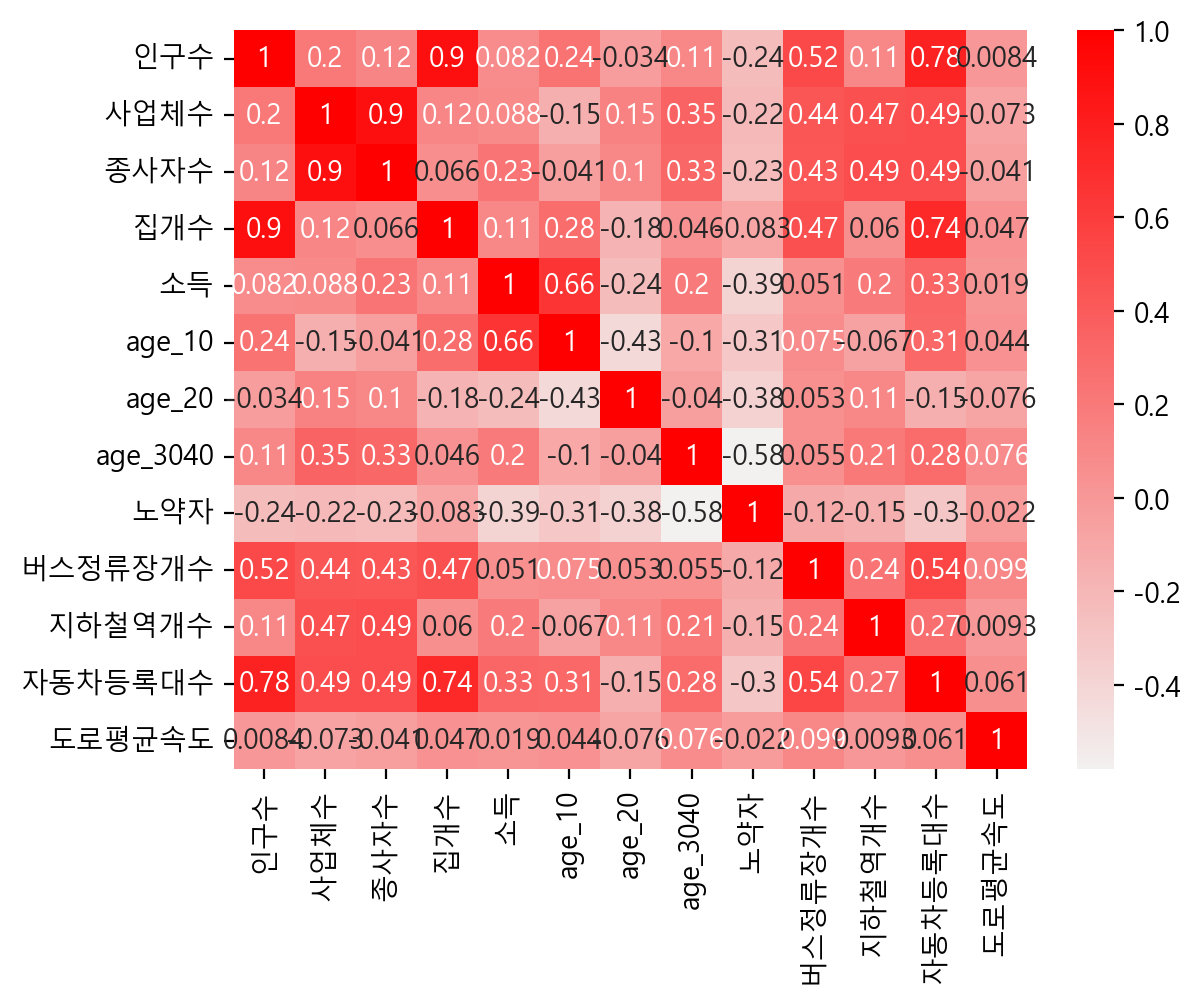

In [28]:
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(merger_df.corr(), annot=True, cmap=cmap)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('버스정류장개수 ~ + 사업체수+ 종사자수 + 집개수 + 소득 + age_10 + age_20 + age_3040 + 노약자 + 지하철역개수 + 자동차등록대수 + 도로평균속도', merger_df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
pd.set_option('display.max_rows', 100)
vif

VIF Factor   features
0   1546.551081  Intercept
1      6.315282       사업체수
2      6.506439       종사자수
3      3.149544        집개수
4      2.407183         소득
5      6.612471     age_10
6      5.208637     age_20
7      5.104895   age_3040
8      7.966524        노약자
9      1.393868     지하철역개수
10     4.584141    자동차등록대수
11     1.035997     도로평균속도

In [30]:
import pandas as pd
import statsmodels.api as sm

reg = sm.OLS.from_formula('버스정류장개수 ~ 인구수 + 사업체수 + 종사자수 + 집개수 + 소득 + age_10 + age_20 + age_3040 + 노약자 + 지하철역개수 + 자동차등록대수 + 도로평균속도', merger_df).fit()

# 회귀분석 결과 출력
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                버스정류장개수   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     27.36
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           2.15e-45
Time:                        16:51:24   Log-Likelihood:                -1629.6
No. Observations:                 425   AIC:                             3285.
Df Residuals:                     412   BIC:                             3338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5945     22.055      0.435      0.6

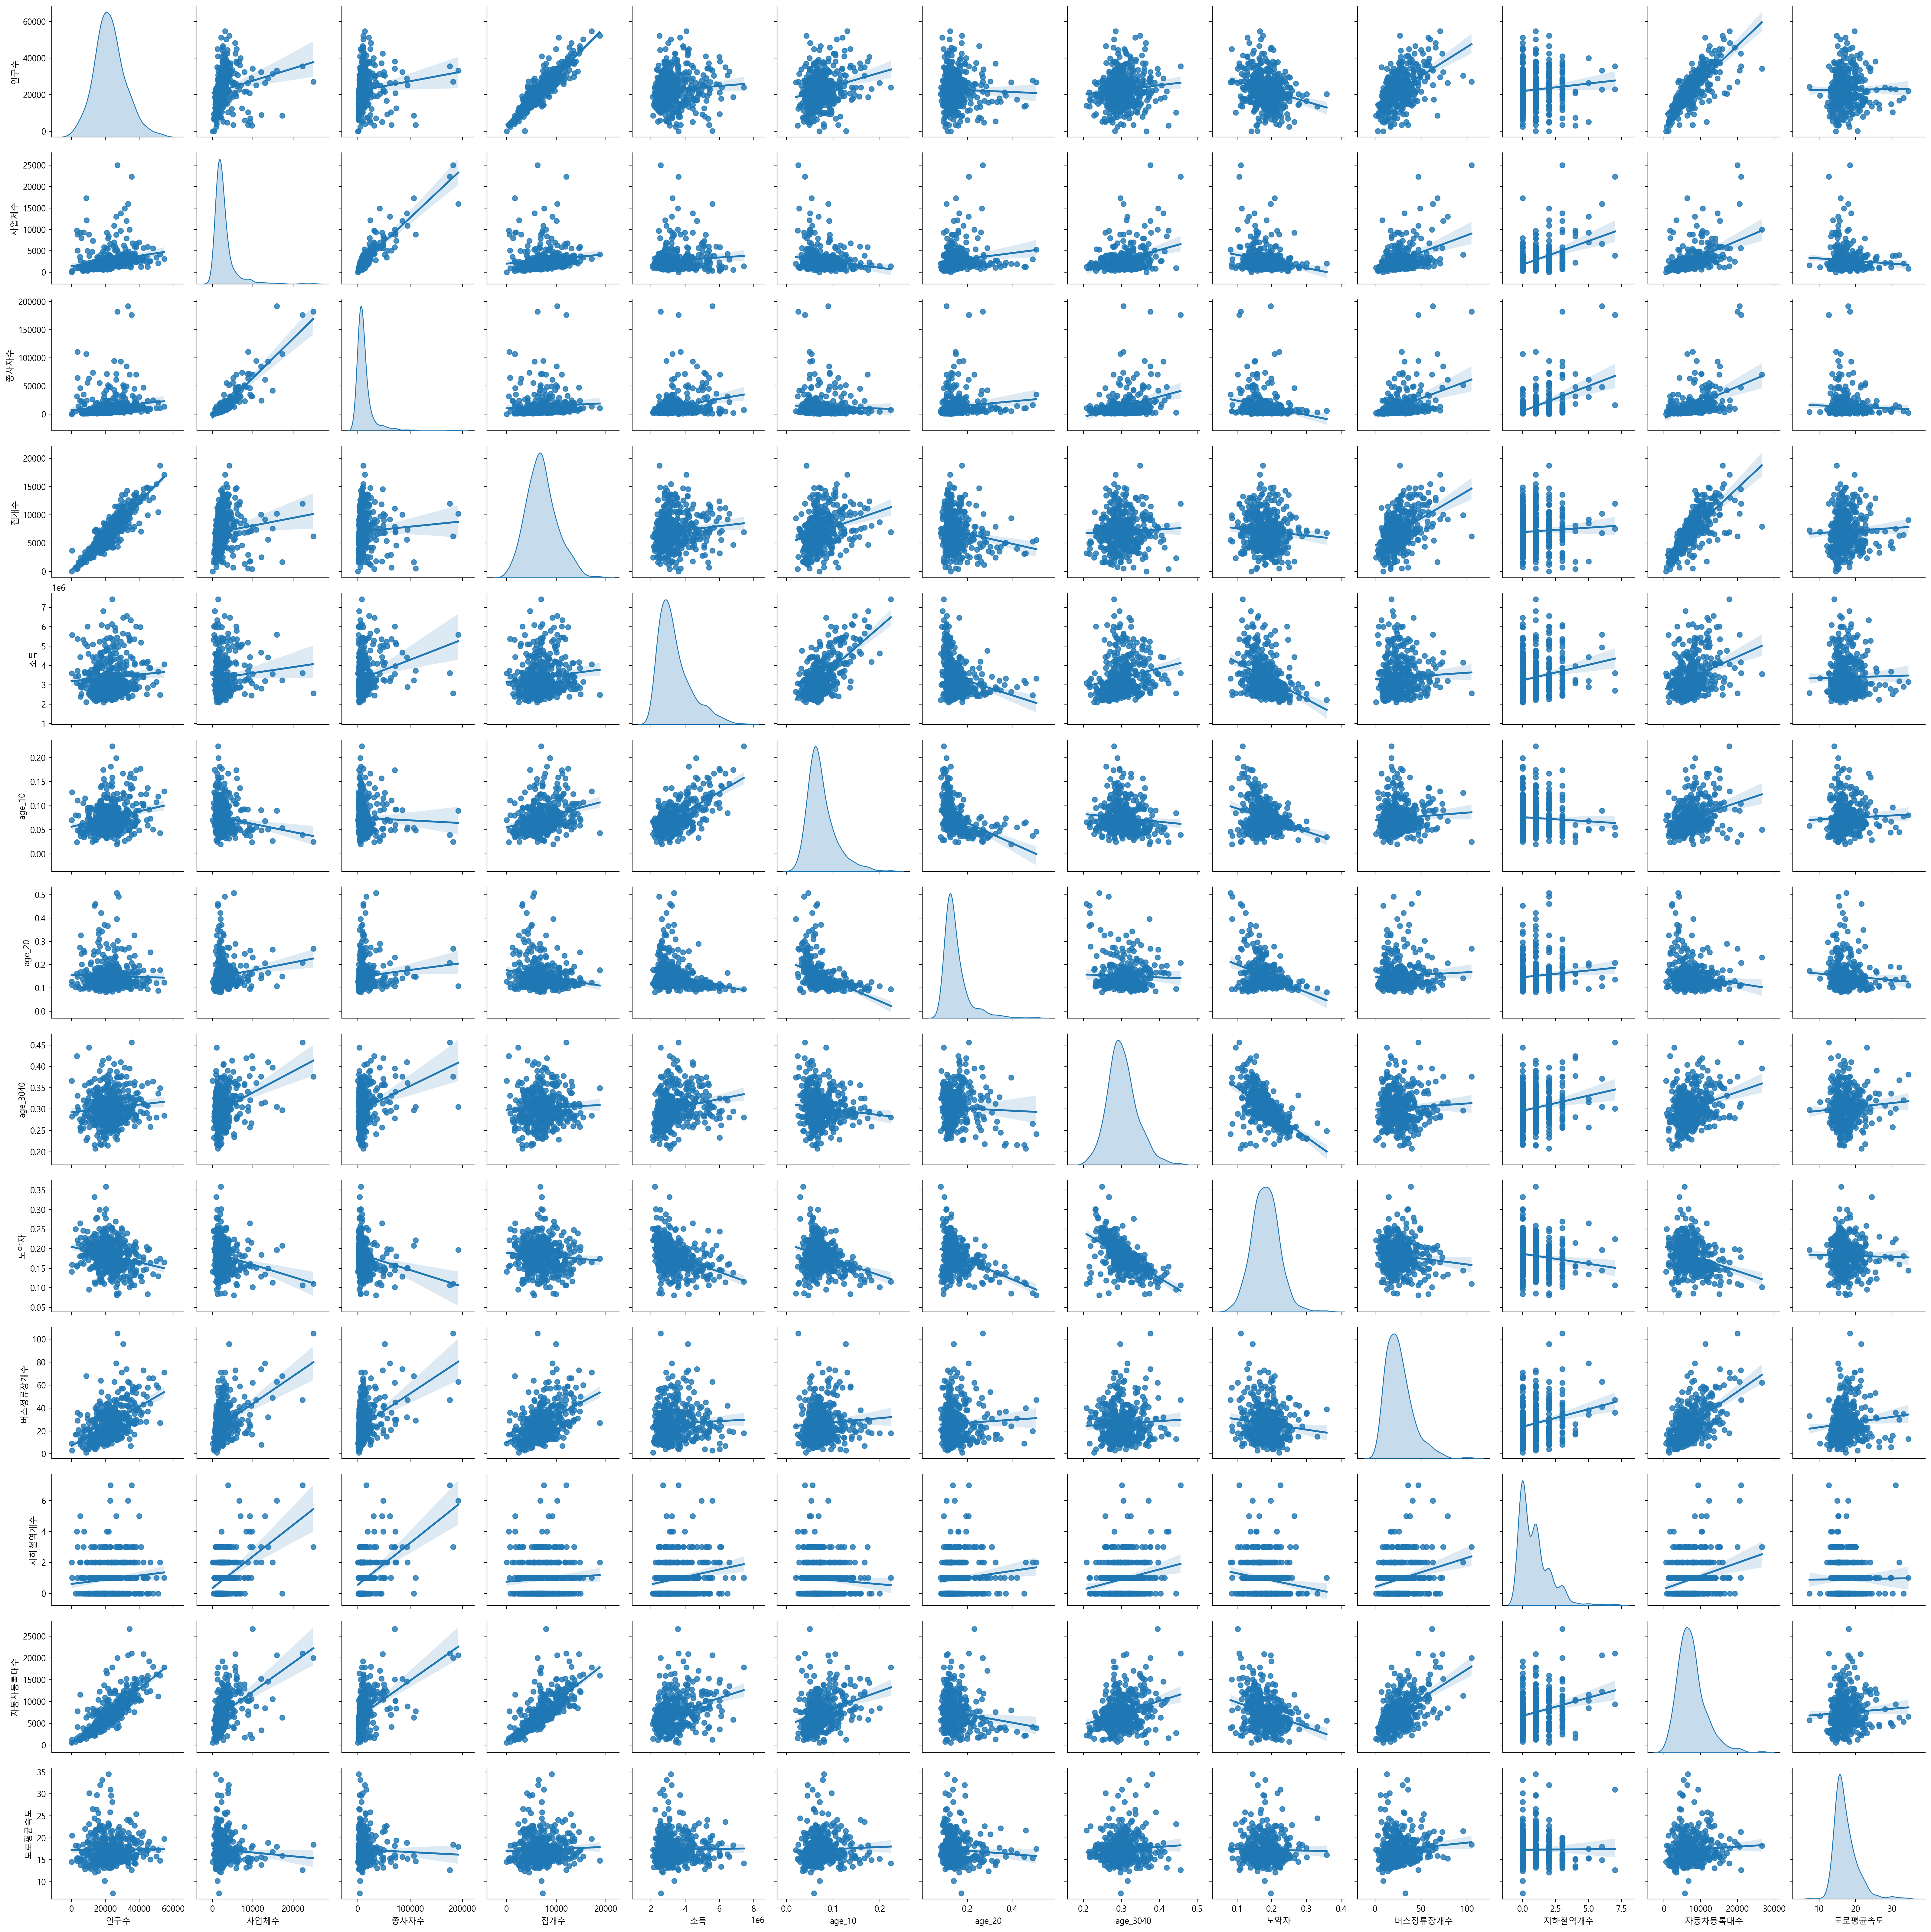

In [31]:
sns.pairplot(merger_df[merger_df.columns[1:]], kind='reg', diag_kind='kde')
plt.show()